In [20]:
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
import numpy as np

In [21]:
image_number = 1
def process(image):
    #while os.path.isfile(f"img/my_img_MNIST/{image_number}.jpg"):
        #try:
    img = cv2.imread(image)

    img = cv2.resize(img,(28,28),interpolation=cv2.INTER_AREA)

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    retval, dst = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    dst = 255-dst
    kernel = np.ones((3,3),np.uint8)
    dst1 = cv2.dilate(dst,kernel)
    #gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    plt.figure(figsize=(20,15))
    plt.imshow(dst1)

    return dst1,img

In [22]:
def imagetotensor(img):
    tensor_gray_img = torch.from_numpy(img)
    tensor_gray_img = tensor_gray_img.resize_(1, 784)
    return tensor_gray_img

In [23]:
def modeler(my_model):    
    class Network(nn.Module):
        
        # Defining the layers, 128, 64, 10 units each
        def __init__(self):
            super().__init__()
            self.fc1 = nn.Linear(784, 400)
            self.fc2 = nn.Linear(400, 200)
            self.fc3 = nn.Linear(200, 100)
            self.fc4 = nn.Linear(100, 10)
            
        # Forward pass through the network, returns the output logits
        def forward(self, x):
            x = self.fc1(x)
            x = F.relu(x)
            x = self.fc2(x)
            x = F.relu(x)
            x = self.fc3(x)
            x = F.relu(x)
            x = self.fc4(x)
            x = F.softmax(x, dim=1)
            return x
    model = Network()
    model.load_state_dict(torch.load(my_model))
    return model


In [24]:
def view_classify(img,org_img ,ps):
    ps = F.softmax(ps,dim=1)
    ps = ps.data.numpy().squeeze()
    
    fig, (ax0,ax1, ax2) = plt.subplots(figsize=(10,30), ncols=3)
    ax0.imshow(org_img)
    ax0.set_title('original image')
    ax1.imshow(img,cmap='gray')
    ax1.set_title('binirized image')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

In [25]:
def classify(saved_model,image_path):
    bin_img, rgb_img = process(image_path)
    set_tensor = transforms.Compose([transforms.ToTensor()])
    img_tensor = set_tensor(bin_img)
    input_img = img_tensor.view(img_tensor.shape[0],-1)
    model = modeler(saved_model)
    prediction = model(input_img)
    view_classify(bin_img,rgb_img,prediction)
    label = prediction.argmax(dim=1).item()
    print(label)
    
    

3


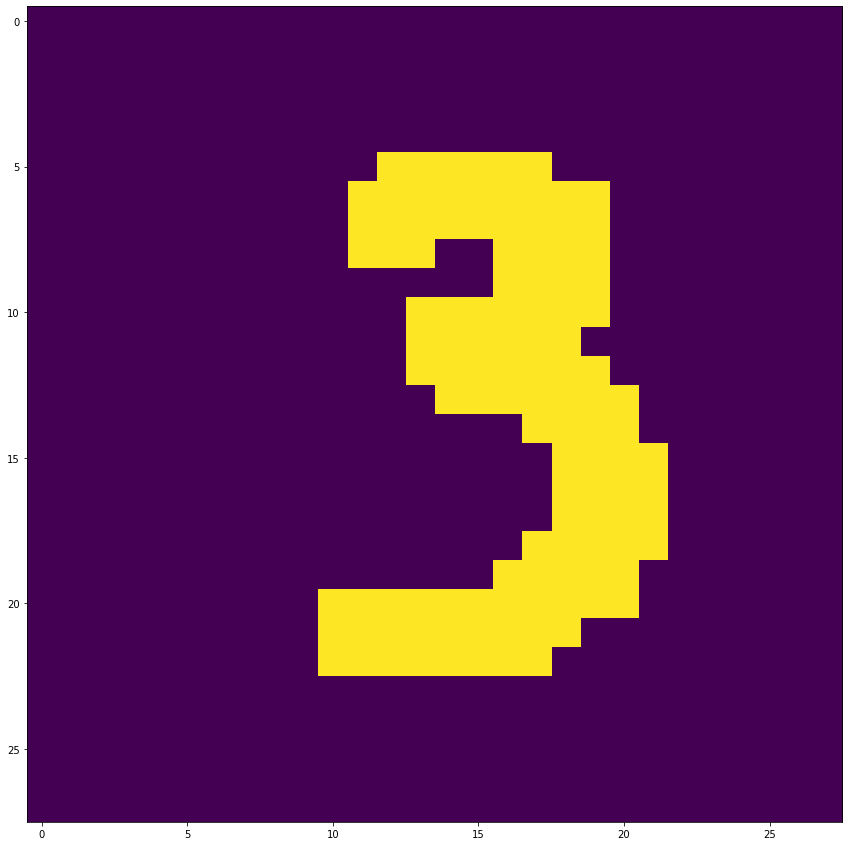

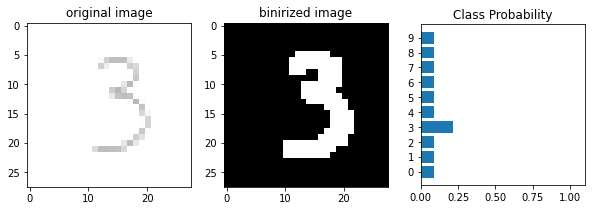

In [26]:
my_model = 'model.pth'
image = "img/my_img_MNIST/3.jpg"
classify(my_model,image)

